Step 1 : Data Description:

Cleaned subset of Sentiment140 data which consists of ahalf a million tweets marked as positive or negative

Step 2: Data preprocessing 



Downloading necessary files 

In [ ]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/investigating-sentiment-analysis/data/sentiment140-subset.csv.zip -P data
!unzip -n -d data data/sentiment140-subset.csv.zip

File ‘data/sentiment140-subset.csv.zip’ already there; not retrieving.

Archive:  data/sentiment140-subset.csv.zip


Read the data


In [ ]:
import pandas as pd

df = pd.read_csv("data/sentiment140-subset.csv", nrows=30000)
df.head()
print(df.shape)


(30000, 2)


In [ ]:
df.head()

,polarity,text
0,0,@kconsidder You never tweet
1,0,Sick today coding from the couch.
2,1,"@ChargerJenn Thx for answering so quick,I was afraid I was gonna crash twitter with all the spamming I did 2 RR..sorry bout that"
3,1,Wii fit says I've lost 10 pounds since last time
4,0,@MrKinetik Not a thing!!! I don't really have a life.....


Step 3: Vectorize Data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
vectors = vectorizer.fit_transform(df.text)
words_df = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_df.head()

,00,000,09,10,100,11,12,13,14,15,16,17,18,1st,20,2009,21,24,25,2am,2day,2morrow,2nd,2nite,30,30am,3d,3rd,40,45,4th,50,able,about,absolutely,abt,ac,access,accident,account,...,writing,wrong,wrote,wtf,www,xbox,xd,xo,xoxo,xx,xxx,xxxx,ya,yall,yard,yay,yea,yeah,year,years,yeh,yep,yes,yesterday,yet,yo,yoga,york,you,young,your,youre,yours,yourself,youtube,yr,yum,yummy,yup,ð½ð
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.338171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Step 4: Sentiment labels
 
How many positive tweets compared to how many negative tweets?

In [ ]:
df.polarity.value_counts()

1    15064
0    14936
Name: polarity, dtype: int64

Step 5: Topic Analysis  

In [ ]:
import spacy
import re

tweets_df=df.loc[:,['text']]
tweets_df.info()

a = 29000

for i in range(a,a+10):
    print(tweets_df.text[i])
    print()


def clean_text(text):
#Make text lowercase   
 text = text.lower()
#remove text in square brackets
 text = re.sub(r'\[.*?\]', '', text)
#remove words containing numbers
 text = re.sub(r'\w*\d\w*', '', text)
 return text
#possibly rename and put at data preprocessing may not be necessary 
tweets_df_clean = pd.DataFrame(tweets_df.text.apply(lambda x: clean_text(x)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30000 non-null  object
dtypes: object(1)
memory usage: 234.5+ KB
I love twitter  it so many who is like me here  hahah in a good way ;D

Omg got loads of stuff to do exams tomorrow 

@ashleebradford I will def. check that book out. Sounds like something right up my ally! 

Portland, you smell wonderful tonight...night blooming jasmine on I5 and tazo tea downtown 

Is Wishing He Had Money To Get To @scotthumphries@lukep182 Birthday Celebrations  Have 5 Pints For Me Each lol

@haileyeliah i would but I'm at lunch with a friend, Sorry 

sitting at work bored and missing @MaryBethCook  wishin we were home drinkin coffee 

guess what as though life couldnt get any worse im afraid i might be getting sick    life can suck

tidak menemukan cd album 'off the beaten path' nya dave koz di disc tarra citrala

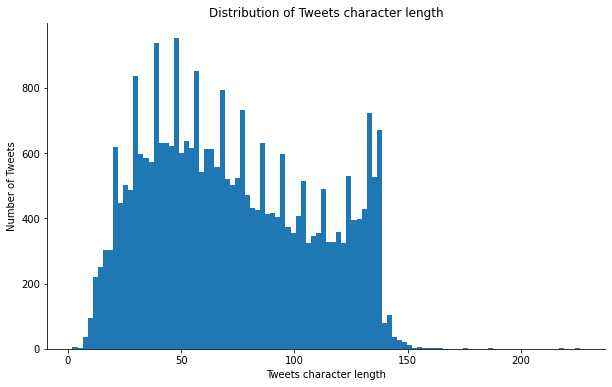

In [ ]:
#bar graph
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in tweets_df_clean.text]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

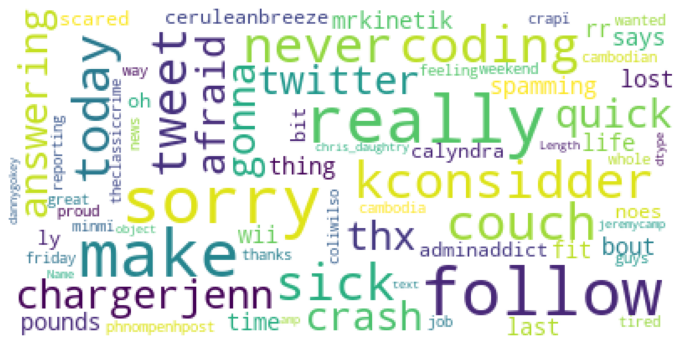

In [ ]:
#word cloud
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=100
                         ).generate(str(tweets_df_clean.text))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

Topic Modeling


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
vectorizer2 = CountVectorizer(
analyzer='word',       
min_df=3,# minimum required occurences of a word 
stop_words='english',# remove stop words
lowercase=True,# convert all words to lowercase
token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
max_features=5000,# max number of unique words
                            )
data_matrix = vectorizer2.fit_transform(tweets_df_clean.text)
data_matrix


<30000x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 156453 stored elements in Compressed Sparse Row format>

In [ ]:
lda_model = LatentDirichletAllocation(
n_components=10, # Number of topics
learning_method='online',
random_state=20,       
n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_matrix)

In [ ]:
for i,topic in enumerate(lda_model.components_):
  print(f'Top 10 words for topic #{i}:')
  print([vectorizer2.get_feature_names()[i] for i in topic.argsort()[-10:]])
  print('\n') 

Top 10 words for topic #0:
['cool', 'did', 'weekend', 'working', 'didn', 'like', 'just', 'new', 'great', 'really']


Top 10 words for topic #1:
['fun', 'nice', 'come', 'need', 'sleep', 'night', 'going', 'think', 'don', 'want']


Top 10 words for topic #2:
['omg', 'summer', 'won', 'gonna', 'wait', 'awesome', 'just', 'haha', 'amp', 'love']


Top 10 words for topic #3:
['day', 'game', 'world', 'days', 'miss', 'bit', 'better', 'way', 'home', 'quot']


Top 10 words for topic #4:
['hate', 'feel', 'wish', 'tomorrow', 'morning', 'good', 'day', 'time', 'work', 'today']


Top 10 words for topic #5:
['lost', 'wanna', 'lol', 'look', 'let', 'soon', 'having', 'yeah', 'sorry', 'bad']


Top 10 words for topic #6:
['things', 'went', 'baby', 'say', 'yay', 'hey', 'week', 'make', 'day', 'good']


Top 10 words for topic #7:
['feeling', 'dont', 'tired', 'happy', 'yes', 'just', 'right', 'got', 'sad', 'lol']


Top 10 words for topic #8:
['time', 'check', 'day', 'actually', 'rain', 'guess', 'doing', 'thank', '

Step 6  Split in 80-20 training
-Used for testing


In [ ]:
X = words_df
y = df.polarity

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

Step 7 : Sentiment Analysis

Up to this point our text has been vecortized and variables set up. What are the algorithms we want to train our model with? We will be using logistic regression, SVC/SVM, and mulinomila naive bayes.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

Using Logistic Regression

In [ ]:
%%time
# Create and train a logistic regression
logreg = LogisticRegression(C=1e9, solver='lbfgs', max_iter=1000)
logreg.fit(X, y)

Using Logistic Regression with L2 Regularization 

In [ ]:
%%time
# Create and train a logistic regression with L2 regularization
lr_with_L2 = LogisticRegression(penalty='l2', C=1e9, solver='lbfgs', max_iter=1000)
lr_with_L2.fit(X, y)

Using SVM/SVC

In [ ]:
%%time
# Create and train a linear support vector classifier (LinearSVC)
svc = LinearSVC()
svc.fit(X, y)

CPU times: user 505 ms, sys: 2.92 ms, total: 508 ms
Wall time: 511 ms


Using MultinomialNB

In [ ]:
%%time
# Create and train a multinomial naive bayes classifier (MultinomialNB)
bayes = MultinomialNB()
bayes.fit(X, y)

CPU times: user 386 ms, sys: 14.1 ms, total: 401 ms
Wall time: 266 ms


Created test data for prediction + or - from the different models above

In [ ]:
# Create some test data

pd.set_option("display.max_colwidth", 200)

testDF = pd.DataFrame({'content': [
    "I love love love love this kitten",
    "I hate hate hate hate this keyboard",
    "I'm not sure how I feel about toast",
    "Did you see the baseball game yesterday?",
    "The package was delivered late and the contents were broken",
    "Trashy television shows are some of my favorites",
    "I'm seeing a Kubrick film tomorrow, I hear not so great things about it.",
    "I find chirping birds irritating, but I know I'm not the only one",
]})
testDF

,content
0,I love love love love this kitten
1,I hate hate hate hate this keyboard
2,I'm not sure how I feel about toast
3,Did you see the baseball game yesterday?
4,The package was delivered late and the contents were broken
5,Trashy television shows are some of my favorites
6,"I'm seeing a Kubrick film tomorrow, I hear not so great things about it."
7,"I find chirping birds irritating, but I know I'm not the only one"


Caluate the prediction and probablity that it is 1 or 0 for algortihms that provide probability

In [ ]:
# Put it through the vectoriser
print(vectorizer.get_feature_names())
# transform, not fit_transform, because we already learned all our words
testDF_vectors = vectorizer.transform(testDF.content)
testDF_words_df = pd.DataFrame(testDF_vectors.toarray(), columns=vectorizer.get_feature_names())
testDF_words_df.head()
testDF_words_df.shape

['00', '000', '09', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '1st', '20', '2009', '21', '24', '25', '2am', '2day', '2morrow', '2nd', '2nite', '30', '30am', '3d', '3rd', '40', '45', '4th', '50', 'able', 'about', 'absolutely', 'abt', 'ac', 'access', 'accident', 'account', 'ache', 'across', 'actually', 'adam', 'add', 'added', 'addicted', 'adorable', 'advice', 'afford', 'afraid', 'after', 'afternoon', 'again', 'against', 'age', 'ages', 'ago', 'agree', 'agreed', 'ah', 'ahead', 'ahh', 'ahhh', 'ahhhh', 'ain', 'aint', 'air', 'airport', 'album', 'alive', 'all', 'allowed', 'almost', 'alone', 'along', 'alot', 'already', 'alright', 'also', 'although', 'always', 'am', 'amazing', 'america', 'american', 'amp', 'an', 'and', 'andy', 'angry', 'ankle', 'anniversary', 'annoyed', 'annoying', 'another', 'answer', 'any', 'anymore', 'anyone', 'anything', 'anytime', 'anyway', 'anyways', 'anywhere', 'apart', 'apartment', 'aplusk', 'app', 'apparently', 'apple', 'appreciate', 'apps', 'are', 'a

(8, 2000)

In [ ]:


# Predict using all our models. 

# Logistic Regression predictions + probabilities
testDF['pred_logreg'] = logreg.predict(testDF_words_df)
testDF['pred_logreg_prob'] = logreg.predict_proba(testDF_words_df)[:,1]

# Random forest predictions + probabilities
testDF['pred_logreg_l2'] = lr_with_L2.predict(testDF_words_df)
testDF['pred_logreg_l2_prob'] = lr_with_L2.predict_proba(testDF_words_df)[:,1]

# SVC predictions
testDF['pred_svc'] = svc.predict(testDF_words_df)

# Bayes predictions + probabilities
testDF['pred_bayes'] = bayes.predict(testDF_words_df)
testDF['pred_bayes_prob'] = bayes.predict_proba(testDF_words_df)[:,1]



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:295: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:295: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check 

In [ ]:
testDF

,content,pred_logreg,pred_logreg_prob,pred_logreg_l2,pred_logreg_l2_prob,pred_svc,pred_bayes,pred_bayes_prob
0,I love love love love this kitten,1,0.956177,1,0.956196,1,1,0.744485
1,I hate hate hate hate this keyboard,0,0.005674,0,0.005669,0,0,0.132735
2,I'm not sure how I feel about toast,0,0.228656,0,0.228942,0,0,0.496844
3,Did you see the baseball game yesterday?,1,0.556233,1,0.555964,1,0,0.477997
4,The package was delivered late and the contents were broken,0,0.054291,0,0.054265,0,0,0.225179
5,Trashy television shows are some of my favorites,0,0.284798,0,0.284978,0,1,0.535908
6,"I'm seeing a Kubrick film tomorrow, I hear not so great things about it.",1,0.754689,1,0.754657,1,1,0.576589
7,"I find chirping birds irritating, but I know I'm not the only one",0,0.047619,0,0.047727,0,0,0.298527


Evaluation:
Confusion Matrix and Accuracy/BestScore


In [ ]:
#Train

print("Training logistic regression")
logreg.fit(X_train, y_train)

print("Training random forest")
lr_with_L2.fit(X_train, y_train)

print("Training SVC")
svc.fit(X_train, y_train)

print("Training Naive Bayes")
bayes.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection, ensemble, metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix



LR

In [ ]:
y_true = y_test
y_pred = logreg.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      3708
           1       0.75      0.76      0.75      3792

    accuracy                           0.75      7500
   macro avg       0.75      0.75      0.75      7500
weighted avg       0.75      0.75      0.75      7500



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:295: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


,Predicted negative,Predicted positive
Is negative,2745,963
Is positive,924,2868


In [ ]:
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted negative,Predicted positive
Is negative,0.740291,0.259709
Is positive,0.243671,0.756329


LR with L2

In [ ]:
y_true = y_test
y_pred = lr_with_L2.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      3708
           1       0.75      0.76      0.75      3792

    accuracy                           0.75      7500
   macro avg       0.75      0.75      0.75      7500
weighted avg       0.75      0.75      0.75      7500



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:295: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


,Predicted negative,Predicted positive
Is negative,2745,963
Is positive,924,2868


In [ ]:
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted negative,Predicted positive
Is negative,0.740291,0.259709
Is positive,0.243671,0.756329


SVC

In [ ]:
y_true = y_test
y_pred = svc.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
label_names = pd.Series(['negative', 'positive'])

pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:295: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


,Predicted negative,Predicted positive
Is negative,2762,946
Is positive,893,2899


In [ ]:
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted negative,Predicted positive
Is negative,0.744876,0.255124
Is positive,0.235496,0.764504


Multinomial Naive Bayes

In [ ]:
y_true = y_test
y_pred = bayes.predict(X_test)
matrix = confusion_matrix(y_true, y_pred)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
label_names = pd.Series(['negative', 'positive'])
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names)


,Predicted negative,Predicted positive
Is negative,2808,900
Is positive,973,2819


In [ ]:
pd.DataFrame(matrix,
     columns='Predicted ' + label_names,
     index='Is ' + label_names).div(matrix.sum(axis=1), axis=0)

,Predicted negative,Predicted positive
Is negative,0.757282,0.242718
Is positive,0.256593,0.743407


Conclusion:

Based on the subset of Sentiment140 the predicted correct was about 75% on average between the different algorithms. With L2 regularizations for logistic regression the prediction was the same as the logistic regression without L2. In terms of ranking SVC and LR performed the best when making predicitons but overall along with MNB, an average of 75% accruacy was calculated for the three algorithms, when predicted was compared to true as seen in the confusion matrices. The accuracy does need to be imporved upon by improved paramterization going forward.